In [8]:
# importing necessary libraries & data set
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#%matplotlib inline
from math import pi

In [9]:
# creating dataframe to predict temperature, delete -99
df2 = pd.read_csv('waves.csv',index_col=0, parse_dates=True,nrows=24000)
df2.dataframeName = 'waves.csv'
df2['SST'].replace(-99.9, df2['SST'].values.mean(), inplace=True)
df2 = df2[(df2["SST"] > -80) & (df2["Tz"] > -80) & (df2["Hmax"] > -80) & (df2["Peak Direction"] > -80)]
#df2.hist(figsize=(10,10))

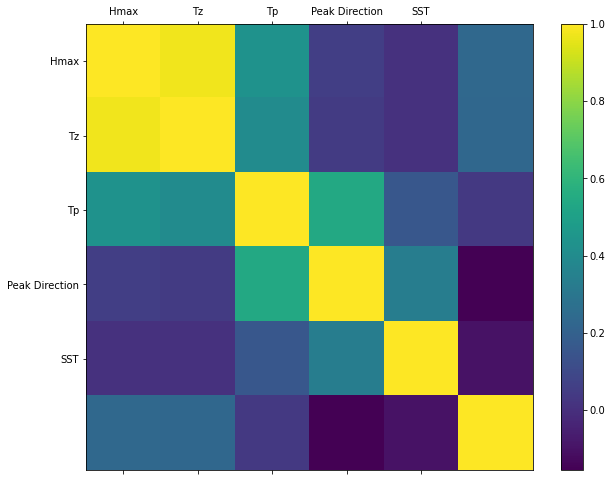

In [10]:
figure = plt.figure(figsize=(10,8))
corr_matrix = df2.corr()
plt.matshow(corr_matrix, fignum=figure.number)
plt.xticks(np.arange(5), df2.columns[1:])
plt.yticks(np.arange(5), df2.columns[1:])
legend=plt.colorbar()
legend.ax.tick_params(labelsize=10)

In [11]:
corr_matrix.style.background_gradient(cmap='coolwarm')

Tz V. Hmax
coefficient of determination: 0.1613
intercept: -0.0256
slope: 0.3828
y =  0.3828 x +  -0.0256


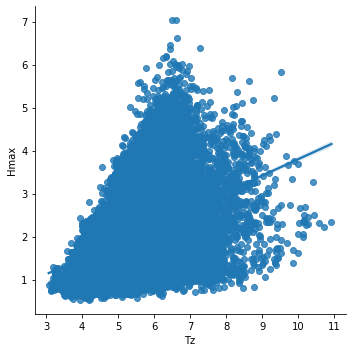

In [12]:
# correlation / linear regression: Tz -> Hmax

print('Tz V. Hmax')
# independent variable
X = df2[['Tz']]
 
# output variable (dependent)
y = df2['Hmax']
 
# using the linear regression model
model = LinearRegression()
 
# fitting the data
model.fit(X, y)
 
# predicting values
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq.round(4))
print('intercept:', model.intercept_.round(4))
print('slope:', model.coef_[0].round(4))
print('y = ',model.coef_[0].round(4),'x + ',model.intercept_.round(4))
sns.lmplot(x ='Tz', y ='Hmax', data = df2)
plt.show()

Tp V. Tz
coefficient of determination: 0.2924
intercept: 3.7085
slope: 0.21
y =  0.21 x +  3.7085


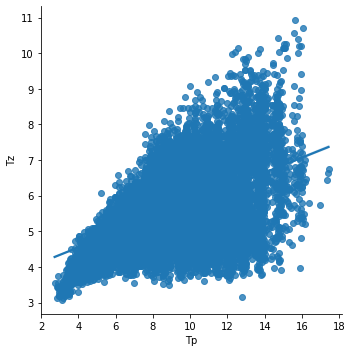

In [13]:
#correlation / linear regression: Tp -> Tz

print('Tp V. Tz')
# independent variable
X = df2[['Tp']]
 
# output variable (dependent)
y = df2['Tz']
 
# using the linear regression model
model = LinearRegression()
 
# fitting the data
model.fit(X, y)
 
# predicting values
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq.round(4))
print('intercept:', model.intercept_.round(4))
print('slope:', model.coef_[0].round(4))
print('y = ',model.coef_[0].round(4),'x + ',model.intercept_.round(4))
sns.lmplot(x ='Tp', y ='Tz', data = df2)
plt.show()

Peak Direction v. Tp
coefficient of determination: 0.1128
intercept: 5.7415
slope: 0.0327
y =  0.0327 x +  5.7415


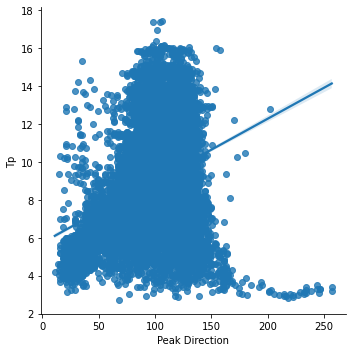

In [14]:
# correlation / linear regression: SST -> Tp

print('Peak Direction v. Tp')
# independent variable
X = df2[['Peak Direction']]
 
# output variable (dependent)
y = df2['Tp']
 
# using the linear regression model
model = LinearRegression()
 
# fitting the data
model.fit(X, y)
 
# predicting values
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq.round(4))
print('intercept:', model.intercept_.round(4))
print('slope:', model.coef_[0].round(4))
print('y = ',model.coef_[0].round(4),'x + ',model.intercept_.round(4))
sns.lmplot(x ='Peak Direction', y ='Tp', data = df2)
plt.show()

In [15]:
%matplotlib inline

In [16]:
df = pd.read_csv('waves.csv',index_col=0, parse_dates=True,nrows=24000)
df.dataframeName = 'waves.csv'
nRow, nCol = df.shape
print(f'Data contains {nRow} rows & {nCol} columns')

Data contains 24000 rows & 6 columns


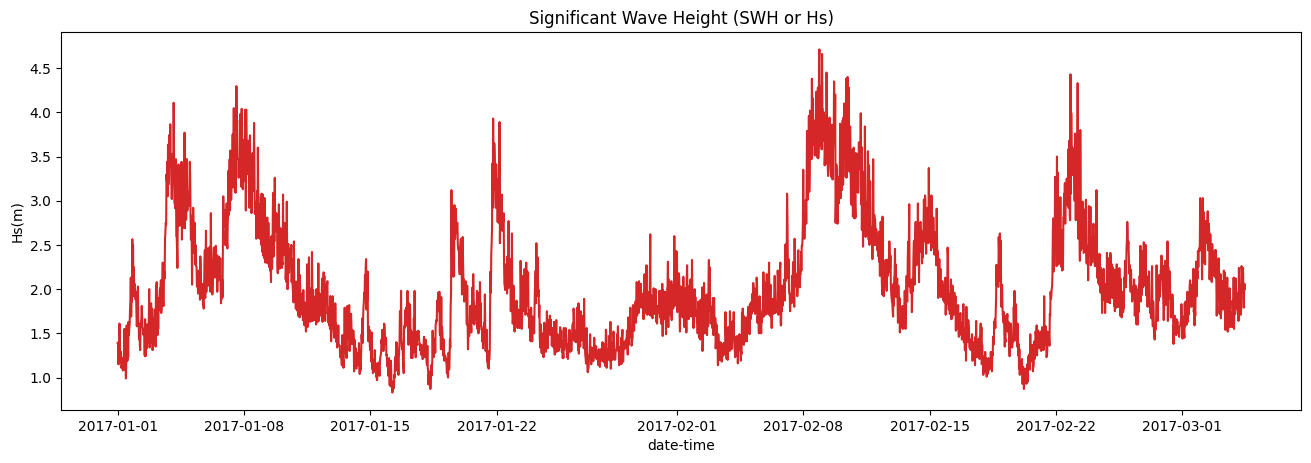

ADF Statistic: -4.097633
p-value: 0.000977
ADF Statistic: -40.896897
p-value: 0.000000


/Users/jessicalaurentaylor/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


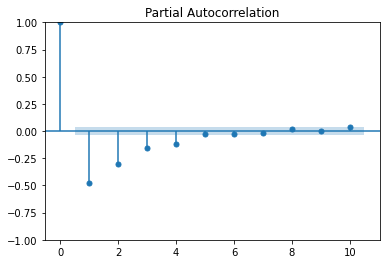

In [17]:
# replacing missing values by interpolated data
df = df.replace(-99.9,np.nan)
df = df.interpolate(limit_direction='both')
def plot_df(x, y, title, xlabel, ylabel, dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# setting up training & testing
train = df.iloc[:3000,1]
test = df.iloc[3000:3200,1]
plot_df( train.index, train.values, "Significant Wave Height (SWH or Hs)", "date-time", "Hs(m)")

# finding d
result=adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
result_diff = adfuller(train.diff().dropna())
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

# series is stationary after one differencing, so d = 1
# q = 2
x=plot_pacf((train.diff()).dropna(),lags=10)

array([[<AxesSubplot:title={'center':'Hs'}>,
        <AxesSubplot:title={'center':'Hmax'}>],
       [<AxesSubplot:title={'center':'Tz'}>,
        <AxesSubplot:title={'center':'Tp'}>],
       [<AxesSubplot:title={'center':'Peak Direction'}>,
        <AxesSubplot:title={'center':'SST'}>]], dtype=object)

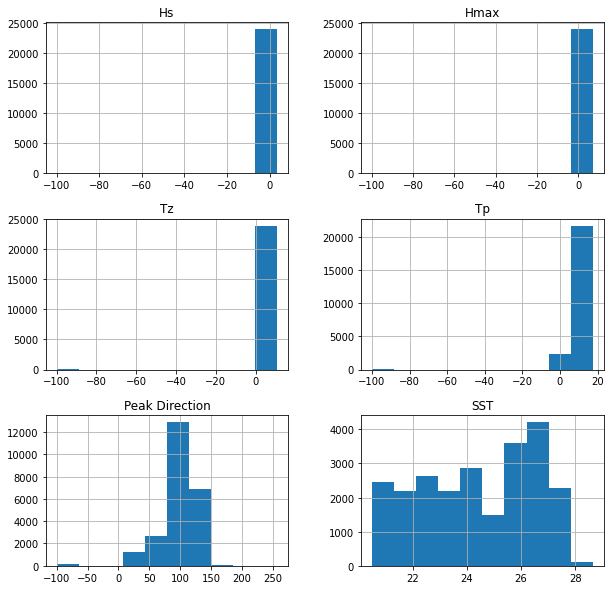

In [18]:
# creating another dataframe, looking at temp & deleting -99
df3 = pd.read_csv('waves.csv',index_col=0, parse_dates=True,nrows=24000)
df3.dataframeName = 'waves.csv'
df3['SST'].replace(-99.9, df3['SST'].values.mean(), inplace=True)
df3.hist(figsize=(10,10))

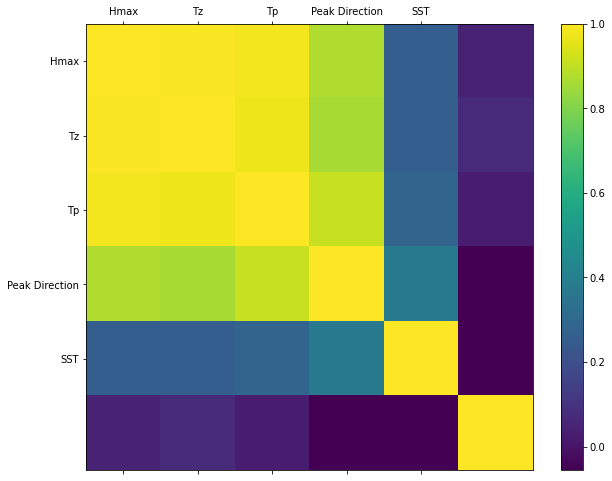

In [19]:
figure = plt.figure(figsize=(10,8))
corr_matrix = df3.corr()
plt.matshow(corr_matrix, fignum=figure.number)
plt.xticks(np.arange(5), df2.columns[1:])
plt.yticks(np.arange(5), df2.columns[1:])
legend=plt.colorbar()
legend.ax.tick_params(labelsize=10)

<AxesSubplot:xlabel='Date/Time'>

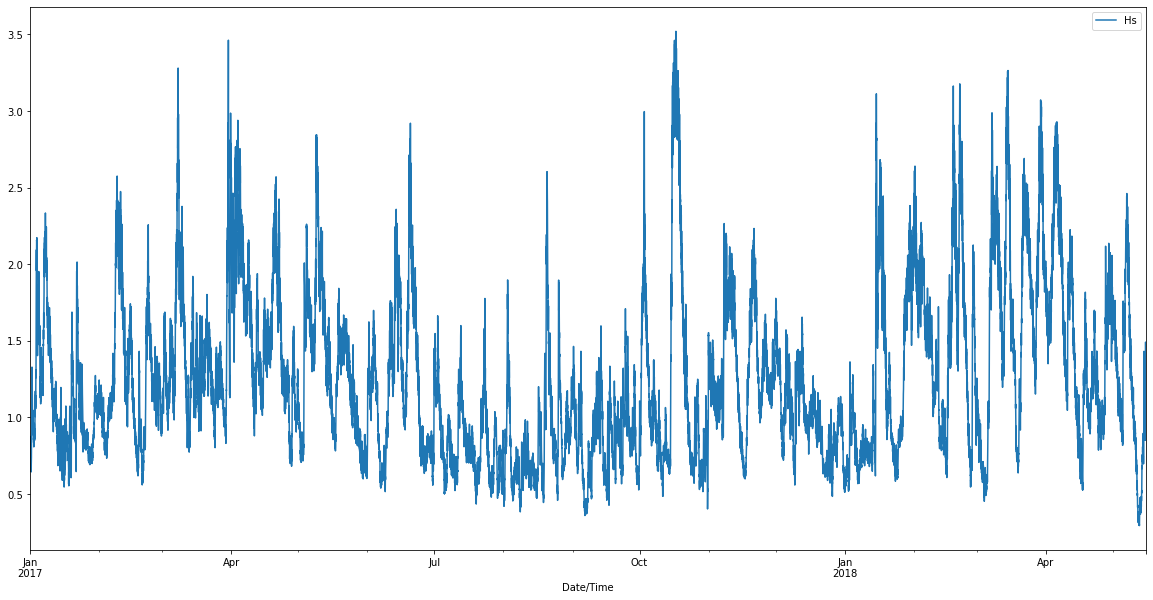

In [20]:
corr_matrix.style.background_gradient(cmap='coolwarm')

df.pivot_table('Hs', index="Date/Time").plot(figsize=(20,10))

In [21]:
waves = pd.read_csv('waves.csv')

waves.columns = ["time", "Hs", "Hmax","Tz","Tp","direction", "temp"]
waves["time"] = pd.to_datetime(waves["time"])
waves["year"] = waves["time"].astype(str).str[0:4]
waves["year"] = waves["year"].astype(int)

waves["time1"] = waves["time"].astype(str).str[11:16]
waves["month"] = waves["time"].astype(str).str[5:7]

waves["dir"] = 10* (waves["direction"] // 10)

waves["temp1"] = (waves["temp"] // 1)
waves.info()
waves = waves[waves.Hs > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43728 entries, 0 to 43727
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       43728 non-null  datetime64[ns]
 1   Hs         43728 non-null  float64       
 2   Hmax       43728 non-null  float64       
 3   Tz         43728 non-null  float64       
 4   Tp         43728 non-null  float64       
 5   direction  43728 non-null  float64       
 6   temp       43728 non-null  float64       
 7   year       43728 non-null  int64         
 8   time1      43728 non-null  object        
 9   month      43728 non-null  object        
 10  dir        43728 non-null  float64       
 11  temp1      43728 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 4.0+ MB


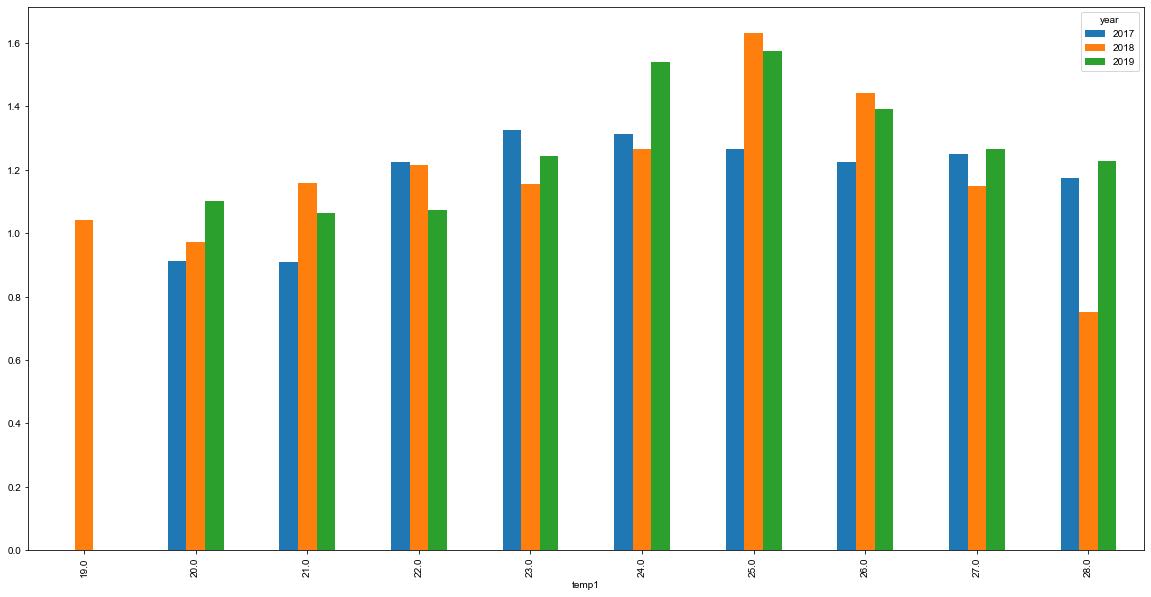

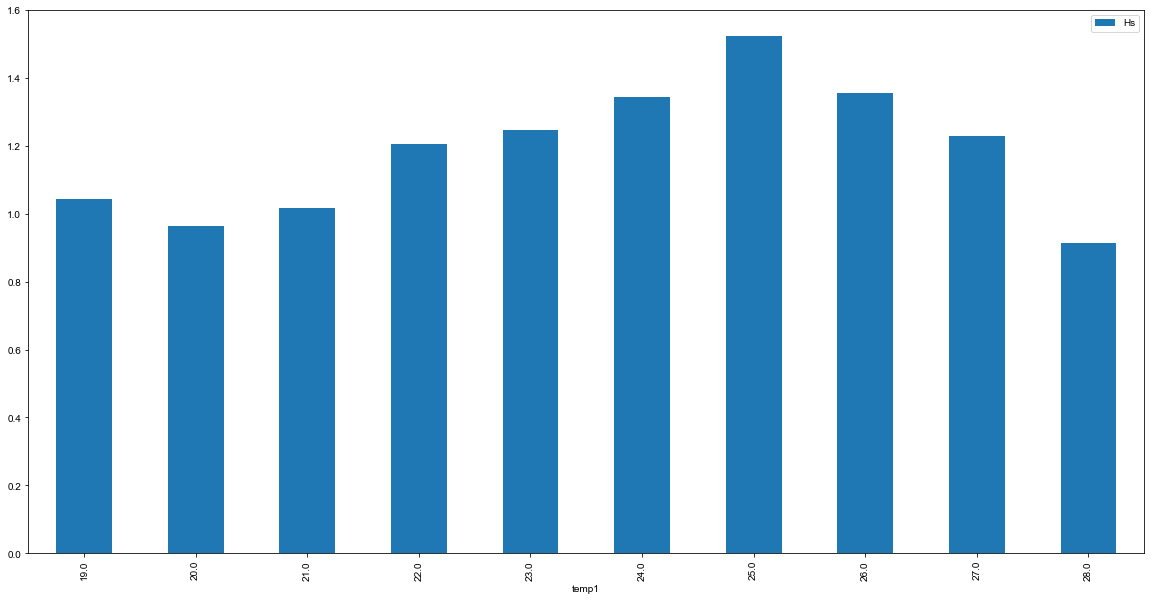

In [22]:
waves[waves.temp1 > 0].pivot_table('Hs', index='year',columns ="temp1" )

waves[waves.temp1 > 0].pivot_table('Hs', index="temp1",columns = 'year').plot(figsize=(20,10), kind="bar")

waves[waves.temp > 0].pivot_table('Hs', index="temp1").plot(figsize=(20,10), kind = "bar")

sns.set() 

Text(0, 0.5, 'Height of waves')

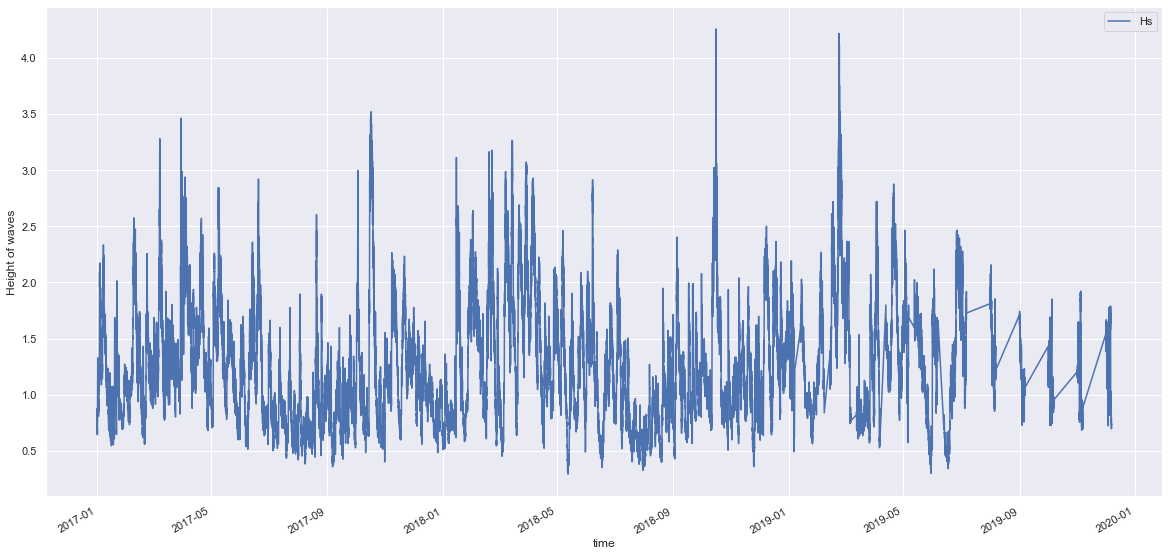

In [23]:
waves[waves.Hs > 0].pivot_table("Hs",index = "time").plot(figsize=(20,10))
plt.ylabel("Height of waves")

Text(0, 0.5, 'Height of waves')

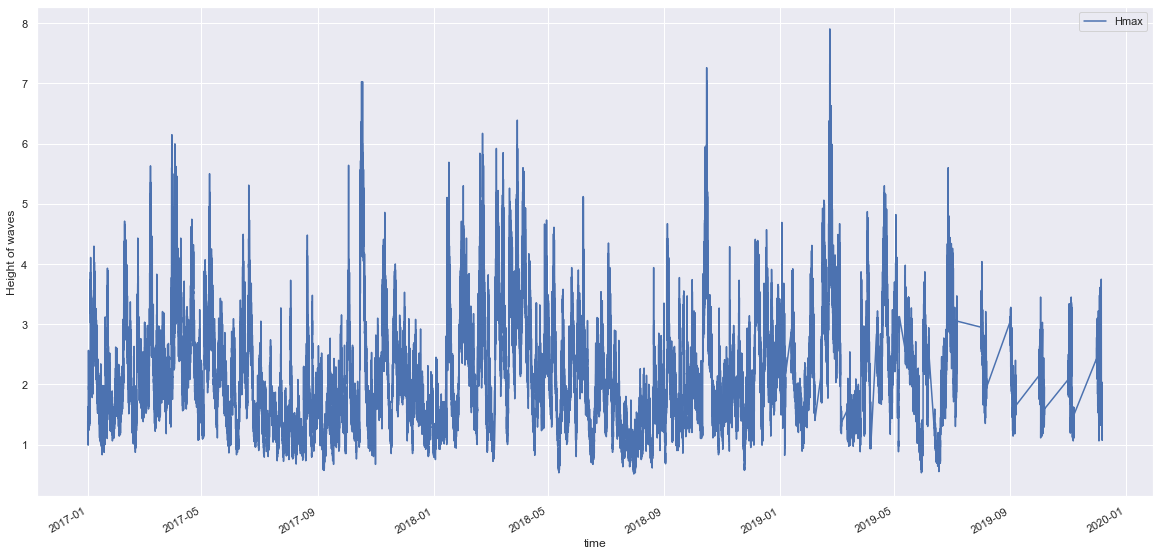

In [24]:
waves[waves.Hs > 0].pivot_table("Hmax",index = "time").plot(figsize=(20,10))
plt.ylabel("Height of waves")

In [25]:
waves[waves.Hs > 0].pivot_table('Hs', index='year',columns = "month")

month        01        02        03        04        05        06        07  \
year                                                                          
2017   1.112207  1.261344  1.401723  1.600152  1.330598  1.242637  0.836827   
2018   1.164329  1.562520  1.721793  1.513944  1.176944  1.190878  0.875884   
2019   1.133123  1.973305  1.105316  1.593860  1.240443  1.256230  1.505330   

month        08        09        10        11        12  
year                                                     
2017   0.866170  0.863067  1.282286  1.335801  0.991928  
2018   0.843514  1.116912  1.346995  1.047188  1.426663  
2019   1.400917  1.109806  1.079667  1.151177  1.231104

<AxesSubplot:xlabel='month'>

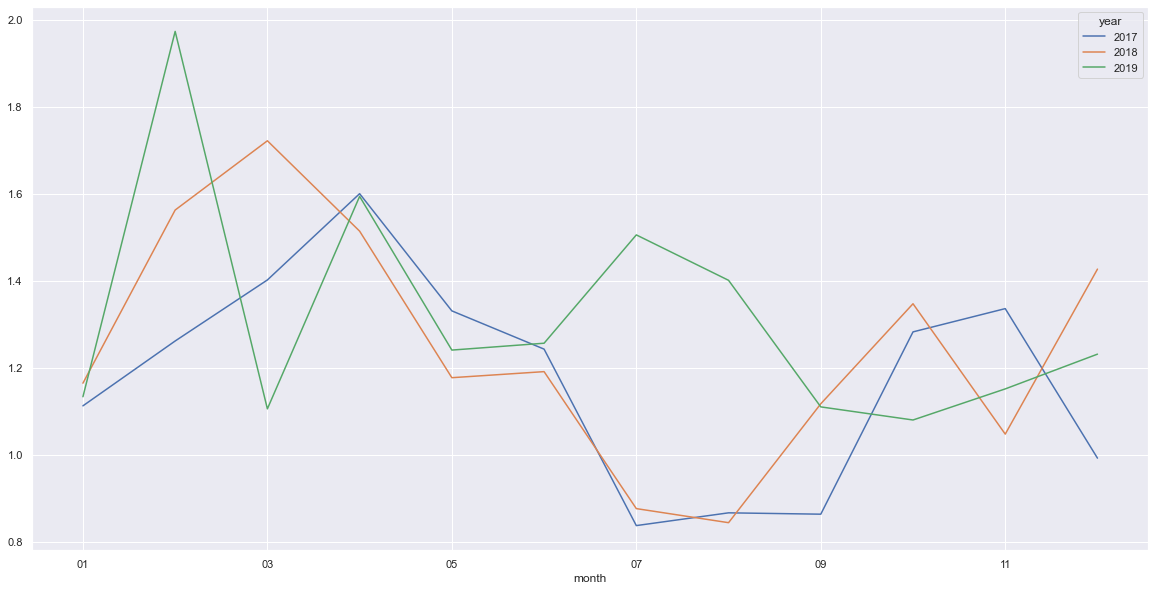

In [26]:
waves.pivot_table('Hs', index="month",columns = 'year').plot(figsize=(20,10))

<AxesSubplot:xlabel='dir'>

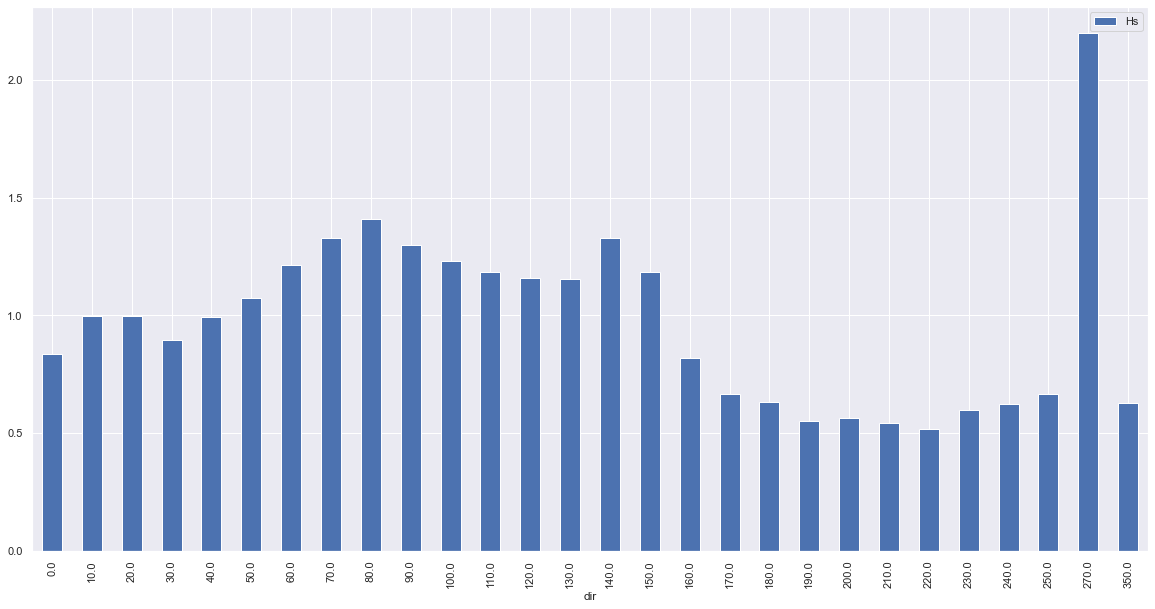

In [27]:
waves[waves.direction > 0].pivot_table('Hs', index="dir").plot(figsize=(20,10), kind = "bar")

In [28]:
waves[waves.direction > 0].pivot_table('Hs', columns="dir")

dir  0.0       10.0      20.0      30.0      40.0     50.0     60.0   \
Hs   0.834  0.997791  0.996323  0.896901  0.993688  1.07238  1.21517   

dir     70.0      80.0      90.0   ...     180.0    190.0     200.0  210.0  \
Hs   1.330351  1.410898  1.298954  ...  0.630143  0.55175  0.561667  0.543   

dir     220.0   230.0   240.0   250.0  270.0  350.0  
Hs   0.516833  0.5955  0.6232  0.6665  2.201  0.629  

[1 rows x 28 columns]

Wave Size Over the Year


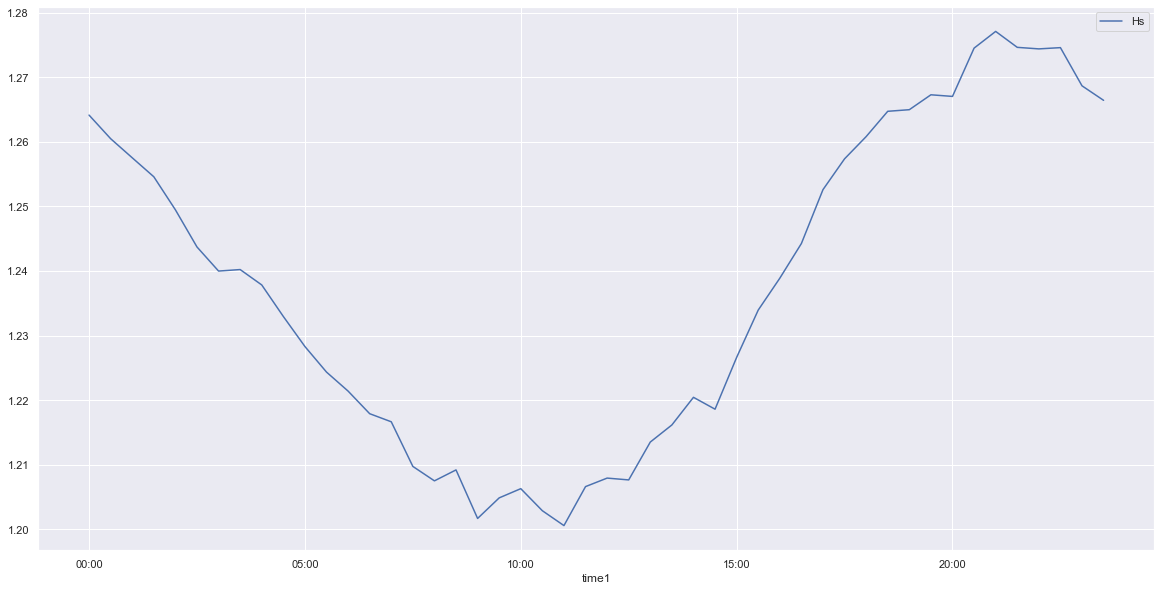

In [29]:
waves.pivot_table('Hs', index="time1").plot(figsize=(20,10))
print('Wave Size Over the Year')

Wave Size in January


<AxesSubplot:xlabel='time1'>

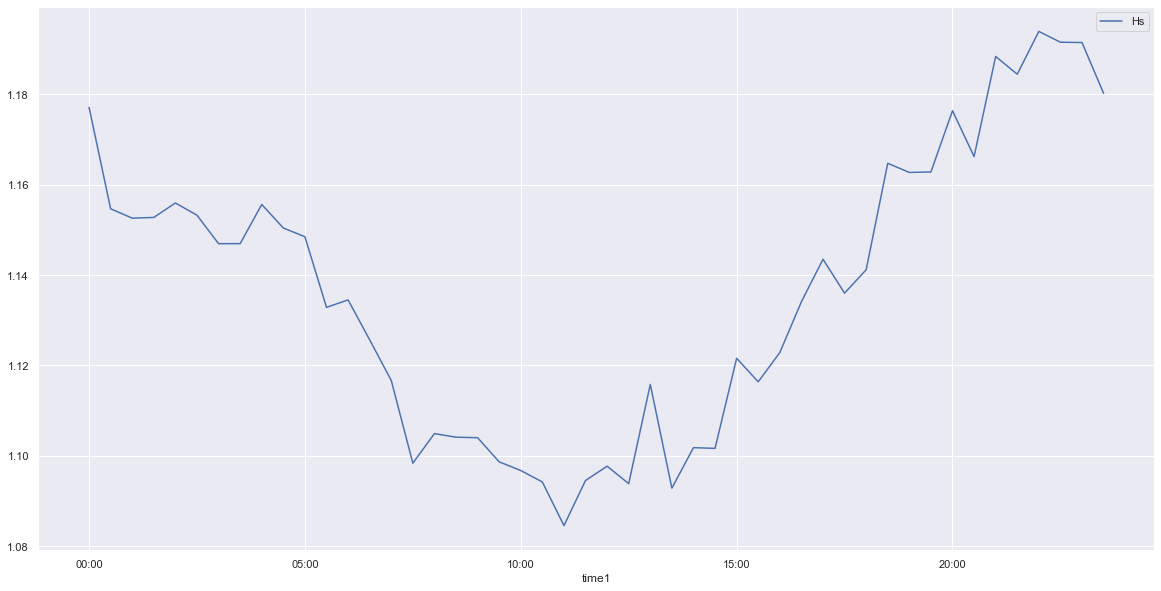

In [30]:
print('Wave Size in January')
waves[waves.month == "01"].pivot_table('Hs', index="time1").plot(figsize=(20,10))

Wave Size in August


<AxesSubplot:xlabel='time1'>

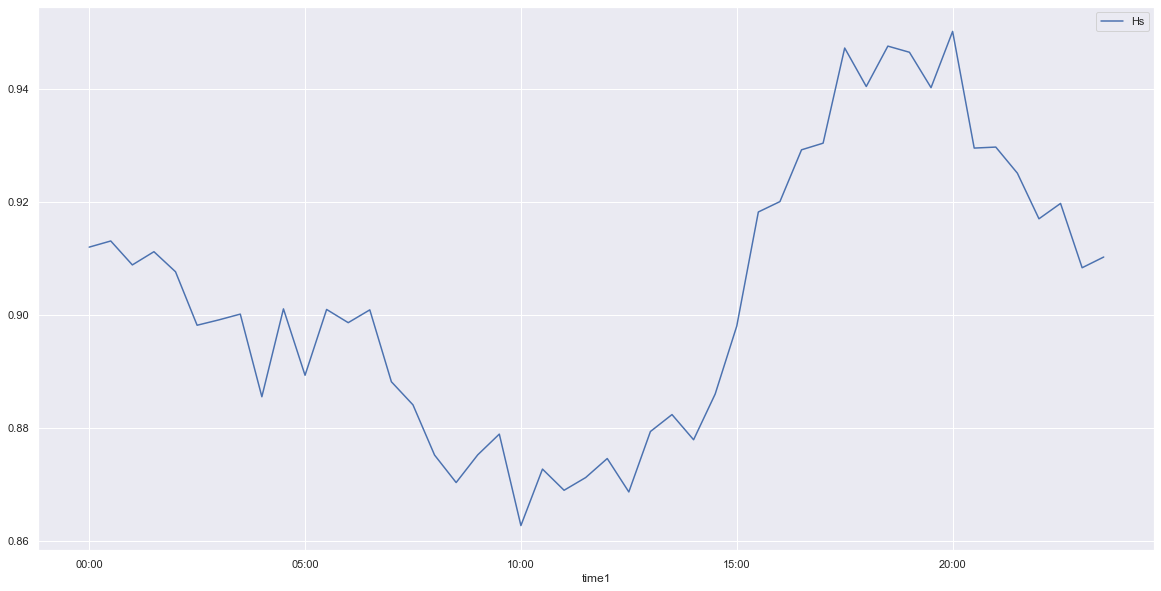

In [31]:
print('Wave Size in August')
waves[waves.month == "08"].pivot_table('Hs', index="time1").plot(figsize=(20,10))

In [32]:
waves.head()

time     Hs  Hmax     Tz     Tp  direction   temp  year  \
1 2017-01-01 00:30:00  0.875  1.39  4.421  4.506      -99.9 -99.90  2017   
2 2017-01-01 01:00:00  0.763  1.15  4.520  5.513       49.0  25.65  2017   
3 2017-01-01 01:30:00  0.770  1.41  4.582  5.647       75.0  25.50  2017   
4 2017-01-01 02:00:00  0.747  1.16  4.515  5.083       91.0  25.45  2017   
5 2017-01-01 02:30:00  0.718  1.61  4.614  6.181       68.0  25.45  2017   

   time1 month    dir  temp1  
1  00:30    01 -100.0 -100.0  
2  01:00    01   40.0   25.0  
3  01:30    01   70.0   25.0  
4  02:00    01   90.0   25.0  
5  02:30    01   60.0   25.0

In [33]:
X_waves = waves.drop("time",axis = 1)
X_waves = X_waves.drop("Hs",axis = 1)
X_waves = X_waves.drop("year",axis = 1)
X_waves = X_waves.drop("time1",axis = 1)
X_waves = X_waves.drop("dir",axis = 1)
#X_waves = X_waves.drop("Hmax",axis = 1)
X = X_waves.drop("temp",axis = 1)
print(X.shape)
#print(X)
y = waves["Hs"]
print(y.shape)

(43643, 6)
(43643,)


<AxesSubplot:xlabel='Hs', ylabel='Count'>

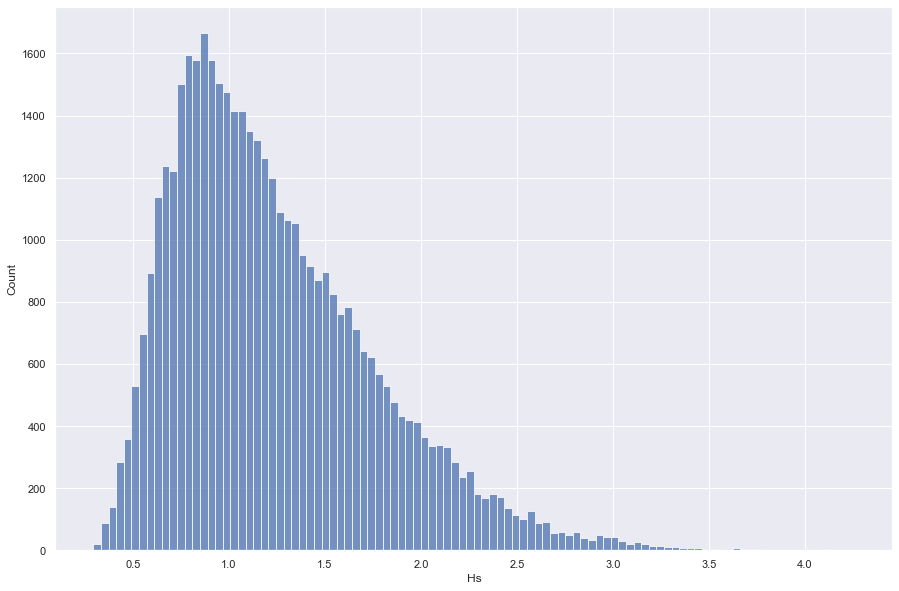

In [37]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.histplot(waves['Hs'])

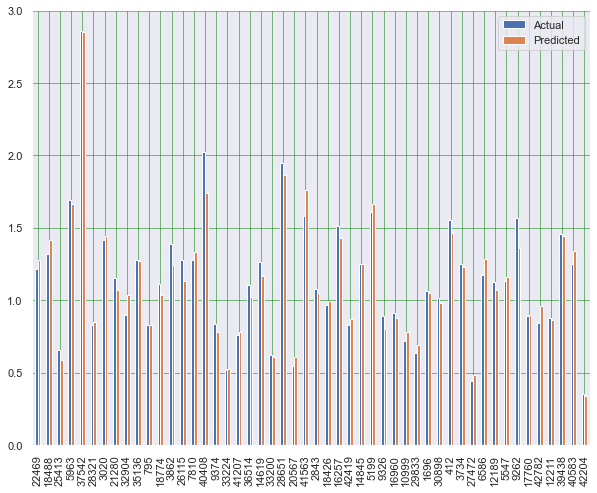

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(50)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08824855767849317
Mean Squared Error: 0.014575837826377988
Root Mean Squared Error: 0.1207304345489487
